In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# Import data & Preprocessing

In [2]:
df = pd.read_csv("Acoustic Features.csv")
df.shape

(400, 51)

In [3]:
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [4]:
df.tail()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969
399,angry,0.086,0.475,5.343,151.748,2.240,-0.014,0.834,-0.021,0.345,...,0.099,1.000,0.094,0.033,0.195,0.110,0.007,0.641,0.848,0.965


In [5]:
df["Class"].value_counts()

Class
relax    100
happy    100
sad      100
angry    100
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [7]:
df.isna().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

In [8]:
df.duplicated().sum()

12

In [9]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           388 non-null    object 
 1   _RMSenergy_Mean                                 388 non-null    float64
 2   _Lowenergy_Mean                                 388 non-null    float64
 3   _Fluctuation_Mean                               388 non-null    float64
 4   _Tempo_Mean                                     388 non-null    float64
 5   _MFCC_Mean_1                                    388 non-null    float64
 6   _MFCC_Mean_2                                    388 non-null    float64
 7   _MFCC_Mean_3                                    388 non-null    float64
 8   _MFCC_Mean_4                                    388 non-null    float64
 9   _MFCC_Mean_5                                    

# EDA

In [10]:
df["Class"].value_counts()

Class
sad      98
relax    97
angry    97
happy    96
Name: count, dtype: int64

In [11]:
df.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,0.134113,0.554229,7.119585,123.763853,2.450974,0.075428,0.489289,0.028884,0.183059,0.039216,...,0.356446,0.589562,0.342820,0.390183,0.328276,0.192930,0.000608,1.776680,0.769451,0.966711
std,0.064511,0.050750,2.215034,34.036019,0.796678,0.538998,0.296201,0.278776,0.195238,0.205306,...,0.335286,0.358927,0.314823,0.350166,0.055536,0.047032,0.104372,0.932943,0.072080,0.003873
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.084750,0.525500,5.863500,101.490250,1.943250,-0.255250,0.281250,-0.121750,0.062000,-0.078250,...,0.068500,0.260500,0.062750,0.061750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.127000,0.554000,6.734000,120.132500,2.378500,0.066500,0.476000,0.041000,0.188500,0.049500,...,0.249500,0.609500,0.249000,0.302500,0.333000,0.191000,-0.001000,1.682000,0.785500,0.967000
75%,0.173250,0.584250,7.804000,148.986250,2.864250,0.421250,0.690250,0.198250,0.296000,0.152250,...,0.612000,1.000000,0.557750,0.692000,0.367250,0.226000,0.063250,2.243000,0.823250,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


In [12]:
df['Class'] = df['Class'].map({'relax': 0, 'happy': 1, 'angry': 2, 'sad': 3})
df

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,0,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,0,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,0,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,0,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,2,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,2,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,2,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [13]:
df.corr()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
Class,1.000000,0.002420,0.001954,-0.181043,0.143170,-0.060666,-0.265930,-0.010495,-0.228040,-0.076708,...,0.067229,-0.084246,0.037347,-0.127334,-0.117051,-0.187306,-0.064648,0.080335,0.098736,0.062800
_RMSenergy_Mean,0.002420,1.000000,-0.273415,-0.156399,0.001152,-0.188618,-0.000266,0.050452,0.025707,-0.062594,...,0.110338,0.114638,0.128795,0.023996,-0.040561,-0.360318,-0.098910,0.149943,0.338638,0.023931
_Lowenergy_Mean,0.001954,-0.273415,1.000000,0.039196,-0.052698,0.120341,0.111297,-0.060049,0.048389,0.004994,...,0.070910,-0.022629,0.093674,-0.030368,0.049630,0.217618,0.223548,-0.115975,-0.198441,-0.054003
_Fluctuation_Mean,-0.181043,-0.156399,0.039196,1.000000,-0.119956,0.046472,0.074045,-0.100972,0.050983,-0.028390,...,-0.041663,-0.107172,0.027975,-0.007815,0.240051,0.322182,0.092629,-0.058423,-0.233482,-0.038282
_Tempo_Mean,0.143170,0.001152,-0.052698,-0.119956,1.000000,-0.064096,0.085682,0.014511,0.039924,0.069224,...,0.022423,0.063757,-0.007526,0.016401,-0.095757,-0.123706,-0.054280,0.012451,0.045617,0.105935
_MFCC_Mean_1,-0.060666,-0.188618,0.120341,0.046472,-0.064096,1.000000,0.017056,0.073518,0.031603,-0.076552,...,-0.134351,-0.079968,-0.118047,-0.026425,-0.019938,0.404736,0.040649,-0.130270,-0.453003,-0.106550
_MFCC_Mean_2,-0.265930,-0.000266,0.111297,0.074045,0.085682,0.017056,1.000000,0.038172,0.380148,0.175313,...,0.021060,0.006685,-0.108785,-0.027033,-0.037315,0.120887,0.143372,-0.041160,-0.144273,0.036357
_MFCC_Mean_3,-0.010495,0.050452,-0.060049,-0.100972,0.014511,0.073518,0.038172,1.000000,0.193440,0.098918,...,-0.107820,0.012955,-0.061350,0.013504,-0.171440,-0.066769,0.069741,-0.045447,-0.018895,-0.081467
_MFCC_Mean_4,-0.228040,0.025707,0.048389,0.050983,0.039924,0.031603,0.380148,0.193440,1.000000,0.282007,...,-0.031100,0.056483,-0.080095,-0.026526,-0.070658,-0.020262,0.120845,-0.060499,0.017734,-0.111234
_MFCC_Mean_5,-0.076708,-0.062594,0.004994,-0.028390,0.069224,-0.076552,0.175313,0.098918,0.282007,1.000000,...,0.036016,-0.003911,0.018237,0.022347,-0.076507,-0.090552,0.021263,0.021380,0.043292,0.006287


In [14]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(150, 100))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(51.5, -0.5)

In [15]:
list(df)

['Class',
 '_RMSenergy_Mean',
 '_Lowenergy_Mean',
 '_Fluctuation_Mean',
 '_Tempo_Mean',
 '_MFCC_Mean_1',
 '_MFCC_Mean_2',
 '_MFCC_Mean_3',
 '_MFCC_Mean_4',
 '_MFCC_Mean_5',
 '_MFCC_Mean_6',
 '_MFCC_Mean_7',
 '_MFCC_Mean_8',
 '_MFCC_Mean_9',
 '_MFCC_Mean_10',
 '_MFCC_Mean_11',
 '_MFCC_Mean_12',
 '_MFCC_Mean_13',
 '_Roughness_Mean',
 '_Roughness_Slope',
 '_Zero-crossingrate_Mean',
 '_AttackTime_Mean',
 '_AttackTime_Slope',
 '_Rolloff_Mean',
 '_Eventdensity_Mean',
 '_Pulseclarity_Mean',
 '_Brightness_Mean',
 '_Spectralcentroid_Mean',
 '_Spectralspread_Mean',
 '_Spectralskewness_Mean',
 '_Spectralkurtosis_Mean',
 '_Spectralflatness_Mean',
 '_EntropyofSpectrum_Mean',
 '_Chromagram_Mean_1',
 '_Chromagram_Mean_2',
 '_Chromagram_Mean_3',
 '_Chromagram_Mean_4',
 '_Chromagram_Mean_5',
 '_Chromagram_Mean_6',
 '_Chromagram_Mean_7',
 '_Chromagram_Mean_8',
 '_Chromagram_Mean_9',
 '_Chromagram_Mean_10',
 '_Chromagram_Mean_11',
 '_Chromagram_Mean_12',
 '_HarmonicChangeDetectionFunction_Mean',
 '_Harmo

In [16]:
def cek_outlier(df, kolom):
  Q1 = df[kolom].quantile(0.25)
  Q3 = df[kolom].quantile(0.75)
  IQR = Q3 - Q1

  batas_bawah = Q1 - 1.5 * IQR
  batas_atas = Q3 + 1.5 * IQR

  outliers = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]

  print(f"Kolom: {kolom}")
  print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
  print(f"Batas bawah = {batas_bawah}, Batas atas = {batas_atas}")
  print(f"Jumlah outliers: {len(outliers)}")

  return outliers

cek = cek_outlier(df, "_Fluctuation_Mean")  #ganti nama fitur yang mau dicek


Kolom: _Fluctuation_Mean
Q1 = 5.8635, Q3 = 7.804, IQR = 1.9405000000000001
Batas bawah = 2.95275, Batas atas = 10.71475
Jumlah outliers: 12


# Split dan modeling data pakai Sklearn

In [17]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [18]:
X

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.799,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,0.104,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,0.039,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,0.214,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,0.062,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: Class, Length: 388, dtype: int64

In [20]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [21]:
X_train

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
88,0.101,0.536,17.573,93.378,1.889,0.725,0.977,0.223,0.196,-0.091,...,1.000,0.239,0.572,0.222,0.366,0.237,0.144,0.561,0.722,0.967
203,0.076,0.594,6.458,168.977,2.894,0.059,0.698,0.159,0.457,0.073,...,0.001,0.347,0.000,0.156,0.283,0.246,-0.104,1.346,0.644,0.975
50,0.158,0.510,6.030,74.154,2.601,-0.060,0.270,0.207,0.368,0.121,...,1.000,0.899,0.051,0.055,0.357,0.236,-0.037,0.481,0.764,0.959
33,0.100,0.548,5.388,164.528,3.062,0.901,0.978,0.469,0.247,0.144,...,0.741,0.001,0.473,0.870,0.285,0.245,0.041,0.673,0.598,0.973
175,0.237,0.473,7.170,144.314,2.050,-0.162,0.320,-0.002,0.008,-0.051,...,0.042,1.000,0.324,0.092,0.310,0.164,-0.214,0.841,0.766,0.968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.070,0.703,7.986,105.143,2.113,0.284,0.186,0.069,0.310,0.158,...,0.241,0.513,0.525,0.776,0.358,0.207,-0.023,0.434,0.816,0.969
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
365,0.251,0.466,4.468,177.357,2.139,-0.227,0.925,-0.012,0.337,0.138,...,0.198,0.149,0.405,1.000,0.257,0.118,-0.257,2.243,0.863,0.961
252,0.176,0.613,7.032,137.497,2.014,-0.170,0.119,0.129,0.402,0.263,...,1.000,0.435,0.630,0.688,0.388,0.205,-0.125,1.223,0.779,0.971


In [22]:
y_train, len(y_train)

(88     0
 203    3
 50     0
 33     0
 175    1
       ..
 165    1
 3      0
 365    2
 252    3
 153    1
 Name: Class, Length: 310, dtype: int64,
 310)

In [23]:
list(X_train)

['_RMSenergy_Mean',
 '_Lowenergy_Mean',
 '_Fluctuation_Mean',
 '_Tempo_Mean',
 '_MFCC_Mean_1',
 '_MFCC_Mean_2',
 '_MFCC_Mean_3',
 '_MFCC_Mean_4',
 '_MFCC_Mean_5',
 '_MFCC_Mean_6',
 '_MFCC_Mean_7',
 '_MFCC_Mean_8',
 '_MFCC_Mean_9',
 '_MFCC_Mean_10',
 '_MFCC_Mean_11',
 '_MFCC_Mean_12',
 '_MFCC_Mean_13',
 '_Roughness_Mean',
 '_Roughness_Slope',
 '_Zero-crossingrate_Mean',
 '_AttackTime_Mean',
 '_AttackTime_Slope',
 '_Rolloff_Mean',
 '_Eventdensity_Mean',
 '_Pulseclarity_Mean',
 '_Brightness_Mean',
 '_Spectralcentroid_Mean',
 '_Spectralspread_Mean',
 '_Spectralskewness_Mean',
 '_Spectralkurtosis_Mean',
 '_Spectralflatness_Mean',
 '_EntropyofSpectrum_Mean',
 '_Chromagram_Mean_1',
 '_Chromagram_Mean_2',
 '_Chromagram_Mean_3',
 '_Chromagram_Mean_4',
 '_Chromagram_Mean_5',
 '_Chromagram_Mean_6',
 '_Chromagram_Mean_7',
 '_Chromagram_Mean_8',
 '_Chromagram_Mean_9',
 '_Chromagram_Mean_10',
 '_Chromagram_Mean_11',
 '_Chromagram_Mean_12',
 '_HarmonicChangeDetectionFunction_Mean',
 '_HarmonicChangeD

In [24]:
models = {"Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Decision Tree': 0.6538461538461539, 'Random Forest': 0.8589743589743589}

# Buat Decision Tree

## Entropi

In [25]:
def hitung_entropi(y):
  data = np.array(y)
  nilai, hitung = np.unique(data, return_counts=True)
  prob = hitung / len(data)
  entropi = -np.sum(prob * np.log2(prob))
  return entropi

cek = hitung_entropi(y)
cek

1.9999616664736632

## Information Gain

In [26]:
def hitung_information_gain(X_fitur, y, threshold):
  entropi_awal = hitung_entropi(y)
  data_kiri = X_fitur <= threshold
  data_kanan = ~data_kiri
  y_kiri = y[data_kiri]
  y_kanan = y[data_kanan]
  entropi_kiri = hitung_entropi(y_kiri)
  entropi_kanan = hitung_entropi(y_kanan)
  bobot_kiri = len(y_kiri) / len(y)
  bobot_kanan = len(y_kanan) / len(y)
  entropi_hasil = (bobot_kiri * entropi_kiri) + (bobot_kanan * entropi_kanan)
  information_gain_fitur = entropi_awal - entropi_hasil
  return information_gain_fitur

In [27]:
kolom_target = 'Class'
daftar_fitur = [col for col in df.columns if col != kolom_target]

hasil_entropi_gain = {}
hasil_gain_max = {'fitur': None, 'gain': -1, 'threshold': None}

entropi_awal = hitung_entropi(df[kolom_target])
print(f"Entropi Awal: {entropi_awal}\n")

for fitur in daftar_fitur:
    mean_fitur = df[fitur].mean()
    X_fitur = df[fitur]
    y_values = df[kolom_target]
    ig_value = hitung_information_gain(X_fitur, y_values, mean_fitur)

    hasil_entropi_gain[fitur] = ig_value
    print(f"{fitur} (Threshold = {mean_fitur:.3f}) IG = {ig_value:.4f}")

    if ig_value > hasil_gain_max['gain']:
        hasil_gain_max['gain'] = ig_value
        hasil_gain_max['fitur'] = fitur
        hasil_gain_max['threshold'] = mean_fitur

print(f"\nFitur Terbaik: {hasil_gain_max['fitur']}")
print(f"Gain: {hasil_gain_max['gain']}")
print(f"Threshold: {hasil_gain_max['threshold']}")

Entropi Awal: 1.9999616664736632

_RMSenergy_Mean (Threshold = 0.134) IG = 0.0402
_Lowenergy_Mean (Threshold = 0.554) IG = 0.0054
_Fluctuation_Mean (Threshold = 7.120) IG = 0.1201
_Tempo_Mean (Threshold = 123.764) IG = 0.0077
_MFCC_Mean_1 (Threshold = 2.451) IG = 0.1675
_MFCC_Mean_2 (Threshold = 0.075) IG = 0.0723
_MFCC_Mean_3 (Threshold = 0.489) IG = 0.0748
_MFCC_Mean_4 (Threshold = 0.029) IG = 0.0318
_MFCC_Mean_5 (Threshold = 0.183) IG = 0.0117
_MFCC_Mean_6 (Threshold = 0.039) IG = 0.0384
_MFCC_Mean_7 (Threshold = 0.060) IG = 0.0721
_MFCC_Mean_8 (Threshold = 0.043) IG = 0.0011
_MFCC_Mean_9 (Threshold = 0.021) IG = 0.0157
_MFCC_Mean_10 (Threshold = 0.027) IG = 0.0055
_MFCC_Mean_11 (Threshold = 0.028) IG = 0.0125
_MFCC_Mean_12 (Threshold = 0.017) IG = 0.0080
_MFCC_Mean_13 (Threshold = 0.025) IG = 0.0228
_Roughness_Mean (Threshold = 523.978) IG = 0.0575
_Roughness_Slope (Threshold = 0.073) IG = 0.0592
_Zero-crossingrate_Mean (Threshold = 998.479) IG = 0.3740
_AttackTime_Mean (Threshold 

In [28]:
seri_ig = pd.Series(hasil_entropi_gain)
sort_fitur= seri_ig.sort_values(ascending=False)

print("Nilai Gain Fitur Dataset")
print(sort_fitur.to_string(float_format='%.4f'))

Nilai Gain Fitur Dataset
_HarmonicChangeDetectionFunction_Std             0.4157
_Zero-crossingrate_Mean                          0.3740
_HarmonicChangeDetectionFunction_PeriodAmp       0.3448
_Eventdensity_Mean                               0.2753
_Pulseclarity_Mean                               0.2407
_EntropyofSpectrum_Mean                          0.2303
_Brightness_Mean                                 0.2039
_HarmonicChangeDetectionFunction_Mean            0.1779
_MFCC_Mean_1                                     0.1675
_Fluctuation_Mean                                0.1201
_AttackTime_Mean                                 0.1163
_Spectralskewness_Mean                           0.0973
_Spectralcentroid_Mean                           0.0922
_Spectralkurtosis_Mean                           0.0844
_Chromagram_Mean_7                               0.0794
_MFCC_Mean_3                                     0.0748
_MFCC_Mean_2                                     0.0723
_MFCC_Mean_7           

## Fitur Selection

In [29]:
kolom_target = 'Class'
daftar_fitur = [col for col in df.columns if col != kolom_target]

daftar_ig = {}
total_ig = 0

for fitur in daftar_fitur:
    mean_fitur = df[fitur].mean()
    X_fitur = df[fitur]
    y_values = df[kolom_target]
    ig = hitung_information_gain(X_fitur, y_values, mean_fitur)

    daftar_ig[fitur] = ig
    total_ig += ig

persen_ig = {
    fitur: (ig / total_ig) * 100
    for fitur, ig in daftar_ig.items()
    }

persen_ig_sorted = dict(sorted(persen_ig.items(), key=lambda x: x[1], reverse=True))

selected_features = []
accum = 0

for fitur, persen in persen_ig_sorted.items():
    if accum >= 90:
        break
    selected_features.append(fitur)
    accum += persen

for fitur, persen in persen_ig_sorted.items():
    print(f"{fitur} : {persen:.3f}%")

print("\nFitur setelah akumulasi 90%")
print(selected_features)
print(f"Akumulasi: {accum:.2f}%")


_HarmonicChangeDetectionFunction_Std : 10.324%
_Zero-crossingrate_Mean : 9.287%
_HarmonicChangeDetectionFunction_PeriodAmp : 8.562%
_Eventdensity_Mean : 6.837%
_Pulseclarity_Mean : 5.978%
_EntropyofSpectrum_Mean : 5.720%
_Brightness_Mean : 5.063%
_HarmonicChangeDetectionFunction_Mean : 4.419%
_MFCC_Mean_1 : 4.160%
_Fluctuation_Mean : 2.982%
_AttackTime_Mean : 2.887%
_Spectralskewness_Mean : 2.417%
_Spectralcentroid_Mean : 2.290%
_Spectralkurtosis_Mean : 2.097%
_Chromagram_Mean_7 : 1.971%
_MFCC_Mean_3 : 1.857%
_MFCC_Mean_2 : 1.797%
_MFCC_Mean_7 : 1.790%
_Roughness_Slope : 1.470%
_Rolloff_Mean : 1.451%
_Roughness_Mean : 1.429%
_Chromagram_Mean_11 : 1.175%
_RMSenergy_Mean : 0.998%
_Chromagram_Mean_2 : 0.996%
_AttackTime_Slope : 0.979%
_MFCC_Mean_6 : 0.954%
_MFCC_Mean_4 : 0.791%
_Chromagram_Mean_1 : 0.782%
_Chromagram_Mean_12 : 0.756%
_HarmonicChangeDetectionFunction_PeriodEntropy : 0.744%
_Chromagram_Mean_8 : 0.741%
_Chromagram_Mean_6 : 0.667%
_Chromagram_Mean_9 : 0.638%
_HarmonicChangeDe

In [30]:
total_ig

4.0267482073007255

In [31]:
selected_features

['_HarmonicChangeDetectionFunction_Std',
 '_Zero-crossingrate_Mean',
 '_HarmonicChangeDetectionFunction_PeriodAmp',
 '_Eventdensity_Mean',
 '_Pulseclarity_Mean',
 '_EntropyofSpectrum_Mean',
 '_Brightness_Mean',
 '_HarmonicChangeDetectionFunction_Mean',
 '_MFCC_Mean_1',
 '_Fluctuation_Mean',
 '_AttackTime_Mean',
 '_Spectralskewness_Mean',
 '_Spectralcentroid_Mean',
 '_Spectralkurtosis_Mean',
 '_Chromagram_Mean_7',
 '_MFCC_Mean_3',
 '_MFCC_Mean_2',
 '_MFCC_Mean_7',
 '_Roughness_Slope',
 '_Rolloff_Mean',
 '_Roughness_Mean',
 '_Chromagram_Mean_11',
 '_RMSenergy_Mean',
 '_Chromagram_Mean_2',
 '_AttackTime_Slope',
 '_MFCC_Mean_6',
 '_MFCC_Mean_4']

In [32]:
fitur_useless = [f for f in daftar_fitur if f not in selected_features]
df_selected = df.drop(columns=fitur_useless)

print("\nFitur yang di-drop:", fitur_useless)
print("\nFitur Akhir")
df_selected


Fitur yang di-drop: ['_Lowenergy_Mean', '_Tempo_Mean', '_MFCC_Mean_5', '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11', '_MFCC_Mean_12', '_MFCC_Mean_13', '_Spectralspread_Mean', '_Spectralflatness_Mean', '_Chromagram_Mean_1', '_Chromagram_Mean_3', '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6', '_Chromagram_Mean_8', '_Chromagram_Mean_9', '_Chromagram_Mean_10', '_Chromagram_Mean_12', '_HarmonicChangeDetectionFunction_Slope', '_HarmonicChangeDetectionFunction_PeriodFreq', '_HarmonicChangeDetectionFunction_PeriodEntropy']

Fitur Akhir


,Class,_RMSenergy_Mean,_Fluctuation_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_6,_MFCC_Mean_7,_Roughness_Mean,...,_Spectralcentroid_Mean,_Spectralskewness_Mean,_Spectralkurtosis_Mean,_EntropyofSpectrum_Mean,_Chromagram_Mean_2,_Chromagram_Mean_7,_Chromagram_Mean_11,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_PeriodAmp
0,0,0.052,9.136,3.997,0.363,0.887,0.078,0.118,-0.151,51.542,...,1121.368,3.621,18.037,0.806,0.000,0.024,0.008,0.316,0.261,0.593
1,0,0.125,6.680,4.058,0.516,0.785,0.397,0.799,-0.403,336.839,...,896.047,4.134,21.990,0.765,0.142,0.120,0.000,0.285,0.211,0.702
2,0,0.046,10.578,2.775,0.903,0.502,0.329,0.140,-0.246,39.864,...,4181.110,0.902,2.366,0.897,0.245,0.563,0.016,0.413,0.299,0.692
3,0,0.135,10.442,2.841,1.552,0.612,0.351,0.143,0.047,353.744,...,2492.422,1.689,4.780,0.840,0.278,0.276,0.161,0.422,0.265,0.743
4,0,0.066,9.769,3.217,0.228,0.814,0.096,0.285,0.104,46.884,...,1776.484,2.739,10.627,0.830,0.000,0.135,1.000,0.345,0.261,0.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2,0.174,5.265,2.985,0.065,0.718,0.046,0.104,0.198,547.713,...,2251.384,1.975,5.929,0.853,0.518,0.025,0.413,0.323,0.140,0.867
396,2,0.176,5.042,2.790,-0.148,0.342,-0.011,0.039,0.065,1121.910,...,3867.683,1.179,2.924,0.902,0.039,0.000,0.640,0.233,0.127,0.879
397,2,0.187,4.724,1.672,0.566,0.880,-0.113,0.214,0.278,889.926,...,3177.802,1.432,4.343,0.891,0.119,0.039,0.287,0.269,0.157,0.819
398,2,0.140,4.470,1.997,-0.210,0.694,0.089,0.062,0.173,408.726,...,2582.756,1.917,6.165,0.872,0.033,0.003,0.304,0.277,0.144,0.811


## Cek kalo semisal nyari IG pake library

In [33]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=df.drop('Class', axis=1).columns).sort_values(ascending=False)

print(feature_importance)

_Zero-crossingrate_Mean                           0.260464
_HarmonicChangeDetectionFunction_Std              0.216127
_HarmonicChangeDetectionFunction_Mean             0.060953
_HarmonicChangeDetectionFunction_PeriodAmp        0.054724
_Pulseclarity_Mean                                0.037644
_Tempo_Mean                                       0.035800
_Rolloff_Mean                                     0.032536
_MFCC_Mean_11                                     0.026319
_RMSenergy_Mean                                   0.025790
_Roughness_Slope                                  0.024769
_Chromagram_Mean_6                                0.024236
_MFCC_Mean_5                                      0.022075
_Chromagram_Mean_3                                0.021905
_Lowenergy_Mean                                   0.020943
_MFCC_Mean_1                                      0.017583
_AttackTime_Mean                                  0.013979
_Chromagram_Mean_1                                0.0129

In [34]:
X_train

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
88,0.101,0.536,17.573,93.378,1.889,0.725,0.977,0.223,0.196,-0.091,...,1.000,0.239,0.572,0.222,0.366,0.237,0.144,0.561,0.722,0.967
203,0.076,0.594,6.458,168.977,2.894,0.059,0.698,0.159,0.457,0.073,...,0.001,0.347,0.000,0.156,0.283,0.246,-0.104,1.346,0.644,0.975
50,0.158,0.510,6.030,74.154,2.601,-0.060,0.270,0.207,0.368,0.121,...,1.000,0.899,0.051,0.055,0.357,0.236,-0.037,0.481,0.764,0.959
33,0.100,0.548,5.388,164.528,3.062,0.901,0.978,0.469,0.247,0.144,...,0.741,0.001,0.473,0.870,0.285,0.245,0.041,0.673,0.598,0.973
175,0.237,0.473,7.170,144.314,2.050,-0.162,0.320,-0.002,0.008,-0.051,...,0.042,1.000,0.324,0.092,0.310,0.164,-0.214,0.841,0.766,0.968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.070,0.703,7.986,105.143,2.113,0.284,0.186,0.069,0.310,0.158,...,0.241,0.513,0.525,0.776,0.358,0.207,-0.023,0.434,0.816,0.969
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
365,0.251,0.466,4.468,177.357,2.139,-0.227,0.925,-0.012,0.337,0.138,...,0.198,0.149,0.405,1.000,0.257,0.118,-0.257,2.243,0.863,0.961
252,0.176,0.613,7.032,137.497,2.014,-0.170,0.119,0.129,0.402,0.263,...,1.000,0.435,0.630,0.688,0.388,0.205,-0.125,1.223,0.779,0.971


In [35]:
X

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.799,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,0.104,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,0.039,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,0.214,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,0.062,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


## Class Decision Tree

In [36]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None,value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

  def is_leaf_node(self):
    return self.value is not None

In [37]:
class DecisionTree:
  def __init__(self, min_samples_split=2, max_depth=100, n_features=100):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_features = n_features
    self.root = None

  def fit(self, X, y):
    self.n_feature = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
    self.root = self.tree(X, y)

  def tree(self, X, y, depth=0):
    jumlah_data, jumlah_fitur = X.shape
    jumlah_kelas = len(np.unique(y))

    if (depth >= self.max_depth or jumlah_kelas == 1 or jumlah_data < self.min_samples_split):
        return Node(value=self.label_terbanyak(y))

    jumlah_fitur = min(jumlah_fitur, self.n_features)
    fitur_terpilih = np.arange(jumlah_fitur)

    threshold, fitur = self.cari_split(X, y, fitur_terpilih)

    kiri = X[:, fitur] <= threshold
    kanan = ~kiri

    left_child = self.tree(X[kiri], y[kiri], depth + 1)
    right_child = self.tree(X[kanan], y[kanan], depth + 1)

    return Node(feature=fitur, threshold=threshold,
                left=left_child, right=right_child)

  def cari_split(self, X, y, fitur_list):
    best_gain = -1
    best_threshold = None
    best_feature = None

    for fitur in fitur_list:
      X_fitur = X[:, fitur]
      nilai_unik = np.unique(X_fitur)
      for threshold in nilai_unik:
          gain = hitung_information_gain(X_fitur, y, threshold)

          if gain > best_gain:
              best_gain = gain
              best_threshold = threshold
              best_feature = fitur

    return best_threshold, best_feature

  def label_terbanyak(self, y):
    nilai, hitung = np.unique(y, return_counts=True)
    return nilai[np.argmax(hitung)]


  def predict(self, X):
    hasil = []
    for baris in X:
        node = self.root
        while node.value is None:
            if baris[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right

        hasil.append(node.value)
    return np.array(hasil)

## Deploy DT Manual Pakai dan Tidak Pakai FS

In [38]:
X = df.drop(columns=['Class']).values
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tree = DecisionTree()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Akurasi Decision Tree:", acc)

Akurasi Decision Tree: 0.7435897435897436


In [39]:
X_after = df_selected.drop(columns=['Class']).values
y_after = df_selected['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X_after, y_after, test_size=0.2, random_state=42, stratify=y_after)

tree = DecisionTree()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Akurasi Decision Tree:", acc)

Akurasi Decision Tree: 0.7564102564102564


In [40]:
# Evaluasi Decision Tree Manual dengan menambahkan parameter

X_after = df_selected.drop(columns=['Class']).values
y_after = df_selected['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X_after, y_after, test_size=0.2, random_state=42, stratify=y_after)

tree = DecisionTree(
    max_depth=300,
    min_samples_split=3
)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Akurasi Decision Tree:", acc)

Akurasi Decision Tree: 0.7564102564102564


## Cek Semisal Pakai Sklearn + Feature Selection

In [41]:
models = {"Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()}
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_after, y_after, test_size=0.2, stratify=y_after)

In [42]:
pd.DataFrame(X_after)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.052,9.136,3.997,0.363,0.887,0.078,0.118,-0.151,51.542,0.325,...,1121.368,3.621,18.037,0.806,0.000,0.024,0.008,0.316,0.261,0.593
1,0.125,6.680,4.058,0.516,0.785,0.397,0.799,-0.403,336.839,0.366,...,896.047,4.134,21.990,0.765,0.142,0.120,0.000,0.285,0.211,0.702
2,0.046,10.578,2.775,0.903,0.502,0.329,0.140,-0.246,39.864,0.224,...,4181.110,0.902,2.366,0.897,0.245,0.563,0.016,0.413,0.299,0.692
3,0.135,10.442,2.841,1.552,0.612,0.351,0.143,0.047,353.744,0.215,...,2492.422,1.689,4.780,0.840,0.278,0.276,0.161,0.422,0.265,0.743
4,0.066,9.769,3.217,0.228,0.814,0.096,0.285,0.104,46.884,-0.118,...,1776.484,2.739,10.627,0.830,0.000,0.135,1.000,0.345,0.261,0.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.174,5.265,2.985,0.065,0.718,0.046,0.104,0.198,547.713,0.060,...,2251.384,1.975,5.929,0.853,0.518,0.025,0.413,0.323,0.140,0.867
384,0.176,5.042,2.790,-0.148,0.342,-0.011,0.039,0.065,1121.910,0.032,...,3867.683,1.179,2.924,0.902,0.039,0.000,0.640,0.233,0.127,0.879
385,0.187,4.724,1.672,0.566,0.880,-0.113,0.214,0.278,889.926,-0.010,...,3177.802,1.432,4.343,0.891,0.119,0.039,0.287,0.269,0.157,0.819
386,0.140,4.470,1.997,-0.210,0.694,0.089,0.062,0.173,408.726,0.174,...,2582.756,1.917,6.165,0.872,0.033,0.003,0.304,0.277,0.144,0.811


In [43]:
pd.DataFrame(y_after)

,0
0,0
1,0
2,0
3,0
4,0
...,...
383,2
384,2
385,2
386,2


In [44]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [45]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Decision Tree': 0.7564102564102564, 'Random Forest': 0.8205128205128205}

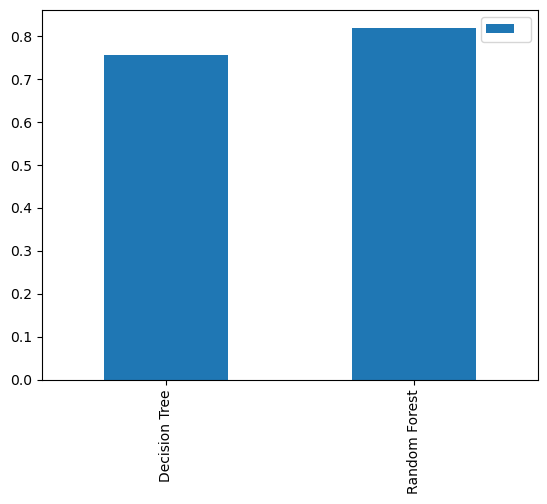

In [46]:
model_compare = pd.DataFrame(model_scores, index=[""])
model_compare.T.plot.bar();

In [47]:
print(classification_report(y_test, models["Decision Tree"].predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.90      0.95      0.92        19
           2       0.83      0.79      0.81        19
           3       0.63      0.60      0.62        20

    accuracy                           0.76        78
   macro avg       0.76      0.76      0.76        78
weighted avg       0.76      0.76      0.76        78



# Buat Random Forest

## Bootstrap

In [48]:
def bootstrap(X, y):
  jumlah_data = X.shape[0]
  pilih_data = np.random.choice(jumlah_data, jumlah_data, replace=True)
  return X[pilih_data], y[pilih_data]

## Class Random Forest

In [49]:
class RandomForest:
  def __init__(self, n_tree=10, min_samples_split=2, max_depth=100, n_features=None):
    self.n_tree = n_tree
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_features = n_features
    self.trees = []

  def fit(self, X, y):
    self.trees = []
    for i in range(self.n_tree):
      tree = DecisionTree(min_samples_split=self.min_samples_split, max_depth=self.max_depth)
      X_sample, y_sample = bootstrap(X, y)
      tree.fit(X_sample, y_sample)
      self.trees.append(tree)

  def predict(self, X):
    prediksi_trees = [tree.predict(X) for tree in self.trees]
    prediksi_trees = np.swapaxes(prediksi_trees, 0, 1)
    hasil = [self.label_terbanyak(prediksi_tree) for prediksi_tree in prediksi_trees]
    return np.array(hasil)

  def label_terbanyak(self, y):
    nilai, hitung = np.unique(y, return_counts=True)
    return nilai[np.argmax(hitung)]

In [50]:
X_after = df_selected.drop(columns=['Class']).values
y_after = df_selected['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X_after, y_after, test_size=0.2, random_state=42, stratify=y_after)

rf = RandomForest()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8461538461538461


# Evaluasi Model

In [51]:
rf_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

In [52]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=50
                           )

rs_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [53]:
rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10}

In [54]:
rs_rf.score(X_test, y_test)

0.8461538461538461

In [55]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.086,5.343,2.240,-0.014,0.834,-0.021,0.266,0.310,258.400,-0.000,...,1784.746,2.446,9.504,0.832,0.019,0.000,0.094,0.195,0.110,0.848
1,0.131,7.565,2.488,-0.023,0.512,0.043,-0.041,-0.177,347.140,-0.031,...,2858.739,1.596,4.648,0.897,1.000,0.681,0.299,0.354,0.171,0.807
2,0.220,7.913,2.069,0.680,0.499,0.227,0.009,0.041,1038.096,0.135,...,3298.332,0.961,2.570,0.898,0.454,0.257,1.000,0.364,0.173,0.812
3,0.106,7.986,2.774,0.100,0.993,0.176,-0.245,0.066,254.121,0.344,...,2372.562,2.190,7.224,0.874,0.005,0.140,0.398,0.311,0.161,0.823
4,0.102,5.942,2.790,-1.359,0.585,0.222,0.204,0.324,255.562,0.070,...,1697.272,1.988,9.326,0.863,0.256,0.407,1.000,0.301,0.184,0.722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.084,7.982,1.317,-0.203,0.347,0.078,0.038,0.165,369.771,-0.048,...,3179.417,1.259,4.278,0.914,0.082,0.414,0.856,0.349,0.220,0.834
74,0.093,7.468,0.423,0.060,1.208,1.126,0.323,0.167,171.521,-0.284,...,3767.280,1.082,3.640,0.909,0.000,0.000,0.402,0.246,0.165,0.754
75,0.033,6.758,3.603,0.392,-0.038,0.482,-0.022,-0.076,12.209,0.135,...,3006.718,1.233,3.446,0.844,0.000,0.955,0.000,0.265,0.244,0.548
76,0.158,9.462,2.166,-0.336,0.820,-0.279,-0.151,-0.423,572.338,-0.119,...,2867.187,1.687,5.268,0.902,0.827,0.324,1.000,0.372,0.189,0.804


In [56]:
y_preds = rs_rf.predict(X_test)
pd.DataFrame(y_preds)

,0
0,2
1,1
2,1
3,2
4,3
...,...
73,1
74,2
75,0
76,1


In [57]:
y_test

array([2, 1, 0, 3, 3, 2, 2, 2, 2, 1, 0, 2, 0, 3, 0, 0, 0, 0, 3, 2, 0, 3,
       2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 3, 1, 0, 1, 1, 3, 0, 1, 3, 3, 3, 3,
       2, 1, 3, 3, 3, 1, 1, 3, 1, 1, 0, 2, 3, 1, 0, 0, 2, 1, 3, 2, 0, 1,
       2, 0, 3, 1, 2, 3, 0, 1, 2, 0, 1, 3], dtype=int64)

In [58]:
print(confusion_matrix(y_test, y_preds))

[[15  2  0  3]
 [ 0 19  0  0]
 [ 1  1 16  1]
 [ 3  0  1 16]]


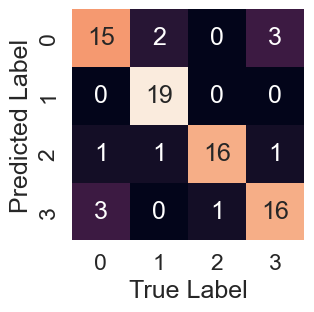

In [59]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)

  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')

plot_conf_mat(y_test, y_preds)

In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.86      1.00      0.93        19
           2       0.94      0.84      0.89        19
           3       0.80      0.80      0.80        20

    accuracy                           0.85        78
   macro avg       0.85      0.85      0.85        78
weighted avg       0.85      0.85      0.84        78

